# TS Viz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator

In [2]:
file_path = 'Datathon 2024 - Reto Hey - Dataset Puìblico - Sheet1.csv'
df = pd.read_csv(file_path)
df['tweet'].to_csv('tweets.csv', index=False)

In [3]:
file_path = 'data_sent.csv'
df = pd.read_csv(file_path)
print(df.shape)
df.head(15)

(812, 6)


,date,tweet,label_sent_roberta,score_sent_roberta,label_sent_roberta_en,score_sent_roberta_en
0,2023-01-01,"Resuelto, muchísimas gracias , excelente servi...",positive,0.895729,positive,0.912319
1,2023-01-02,"Muchas gracias, espero su dm",neutral,0.587657,positive,0.917375
2,2023-01-02,Muchas gracias!,positive,0.898202,positive,0.908206
3,2023-01-02,Algo similar me paso. Quería renovar mi token ...,positive,0.427639,positive,0.526836
4,2023-01-02,Yeeeei! a través de mi cuenta en acabo de cont...,positive,0.851798,positive,0.781223
5,2023-01-02,Esta es la señal que necesitan para tener el m...,neutral,0.730076,neutral,0.574806
6,2023-01-03,Gracias 😁,positive,0.792955,positive,0.830587
7,2023-01-03,Muchas gracias 😊,positive,0.876376,positive,0.888515
8,2023-01-03,"Yo no sé mucho, pero te recomiendo la Inversió...",positive,0.863968,positive,0.865908
9,2023-01-04,Gracias por la playera que me dieron en Galerí...,positive,0.844346,positive,0.836683


In [4]:
df.tail(5)

,date,tweet,label_sent_roberta,score_sent_roberta,label_sent_roberta_en,score_sent_roberta_en
807,2024-04-21,"Ahora confirmo, gracias estimado",positive,0.633604,positive,0.795586
808,2024-04-23,😔 de acuerdo!! Muchas gracias.,positive,0.700050,positive,0.526026
809,2024-04-23,"Tío cuando me van a graduar, tengo la TDC gara...",neutral,0.416250,positive,0.758274
810,2024-04-25,"una duda, con quién tengo que ver si tengo pro...",negative,0.657139,negative,0.825650
811,2024-04-26,"Wey, lo mejor de es que puedo pagar con Apple ...",positive,0.849022,positive,0.830270


In [5]:
counts

NameError: name 'counts' is not defined

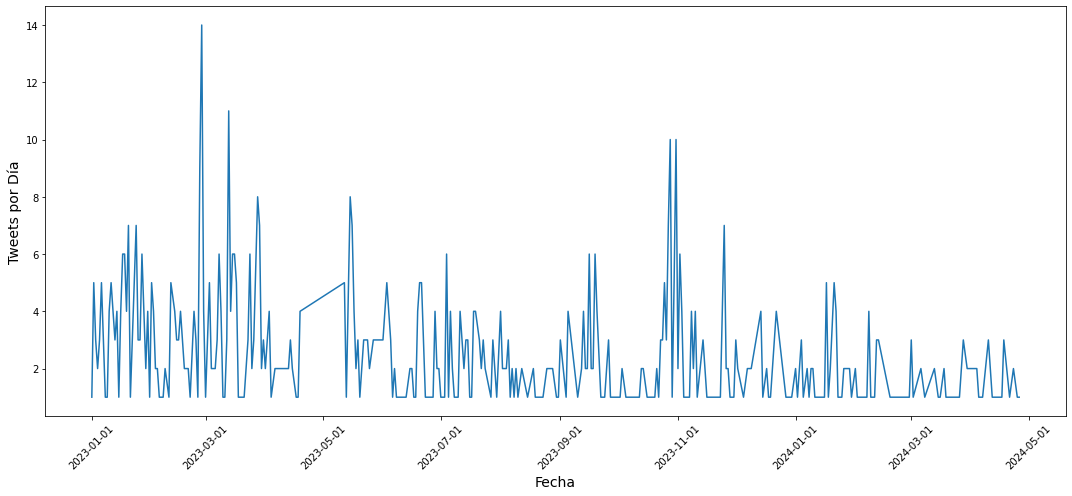

In [8]:
counts = pd.DataFrame()
counts['date'] = df.groupby('date').size().index
df['date'] = pd.to_datetime(df['date'])
counts['total'] = df.groupby('date').size().values
plt.figure(figsize=(15,7))
plt.plot(counts['date'], counts['total'])
# Date formatting
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(AutoDateLocator())
# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Tweets por Día', fontsize=14)
# Automatically adjust subplot params for a better fit
plt.tight_layout()
plt.savefig('ts_counts.png')
plt.show()

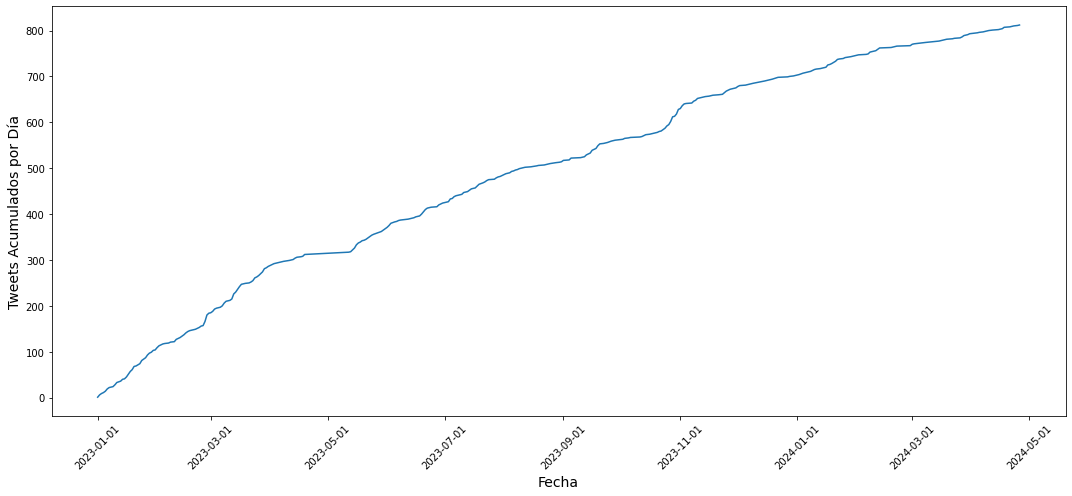

In [9]:
counts['cumsum'] = counts['total'].cumsum()
plt.figure(figsize=(15,7))
plt.plot(counts['date'], counts['cumsum'])
# Date formatting
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(AutoDateLocator())
# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Tweets Acumulados por Día', fontsize=14)
# Automatically adjust subplot params for a better fit
plt.tight_layout()
plt.savefig('ts_counts_cumsum.png')
plt.show()

In [16]:
counts['total'].mean()

2.506172839506173

In [18]:
counts[counts['total']==7]

,date,total,cumsum
18,2023-01-20,7,68
21,2023-01-24,7,81
77,2023-03-29,7,281
95,2023-05-16,7,333
217,2023-10-27,7,602
237,2023-11-25,7,668


In [7]:
df_neutral = df[df['label_sent_roberta_en']=='neutral']
df_positive = df[df['label_sent_roberta_en']=='positive']
df_negative = df[df['label_sent_roberta_en']=='negative']

In [23]:
df_neutral

,date,tweet,label_sent_roberta,score_sent_roberta,label_sent_roberta_en,score_sent_roberta_en
5,2023-01-02,Esta es la señal que necesitan para tener el m...,neutral,0.730076,neutral,0.574806
22,2023-01-08,A mí me llegó una semana después aprox,neutral,0.830605,neutral,0.823079
26,2023-01-10,"Bloquea la tarjeta 5 minutos o más, posteriome...",negative,0.461350,neutral,0.641020
31,2023-01-11,Vale estoy esperando,neutral,0.803347,neutral,0.622673
35,2023-01-13,Contéstenme por favor,neutral,0.534969,neutral,0.566257
...,...,...,...,...,...,...
783,2024-03-26,Buen dia! Hay alguna promocion a MSI para el p...,neutral,0.769291,neutral,0.859670
784,2024-03-27,Yo sí recomiendo! Aunque siento que es difícil...,neutral,0.587125,neutral,0.464850
788,2024-03-28,"Hola! Gracias, acabo de enviar correo.",neutral,0.676271,neutral,0.539720
789,2024-03-30,"hola, Les mande dm :)",neutral,0.546997,neutral,0.546997


In [76]:
counts_neutral = pd.DataFrame()
counts_neutral['date'] = df_neutral.groupby('date').size().index
counts_neutral['total'] = df_neutral.groupby('date').size().values
#counts_neutral
counts_positive = pd.DataFrame()
counts_positive['date'] = df_positive.groupby('date').size().index
counts_positive['total'] = df_positive.groupby('date').size().values
#counts_positive['cumsum'] = counts_positive['total'].cumsum()
counts_negative = pd.DataFrame()
counts_negative['date'] = df_negative.groupby('date').size().index
counts_negative['total'] = df_negative.groupby('date').size().values
#counts_negative['cumsum'] = counts_negative['total'].cumsum()

In [77]:
start_date = '2023-01-01'
end_date = '2024-04-26'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
# Reindex the DataFrame using the full date range

In [78]:
neutral_complete = pd.DataFrame()
neutral_complete['date'] = date_range
neutral_complete = pd.merge(neutral_complete, counts_neutral, on='date', how='left')
neutral_complete.fillna(0, inplace=True)
neutral_complete['cumsum'] = neutral_complete['total'].cumsum()
positive_complete = pd.DataFrame()
positive_complete['date'] = date_range
positive_complete = pd.merge(positive_complete, counts_positive, on='date', how='left')
positive_complete.fillna(0, inplace=True)
positive_complete['cumsum'] = positive_complete['total'].cumsum()
negative_complete = pd.DataFrame()
negative_complete['date'] = date_range
negative_complete = pd.merge(negative_complete, counts_neutral, on='date', how='left')
negative_complete.fillna(0, inplace=True)
negative_complete['cumsum'] = negative_complete['total'].cumsum()

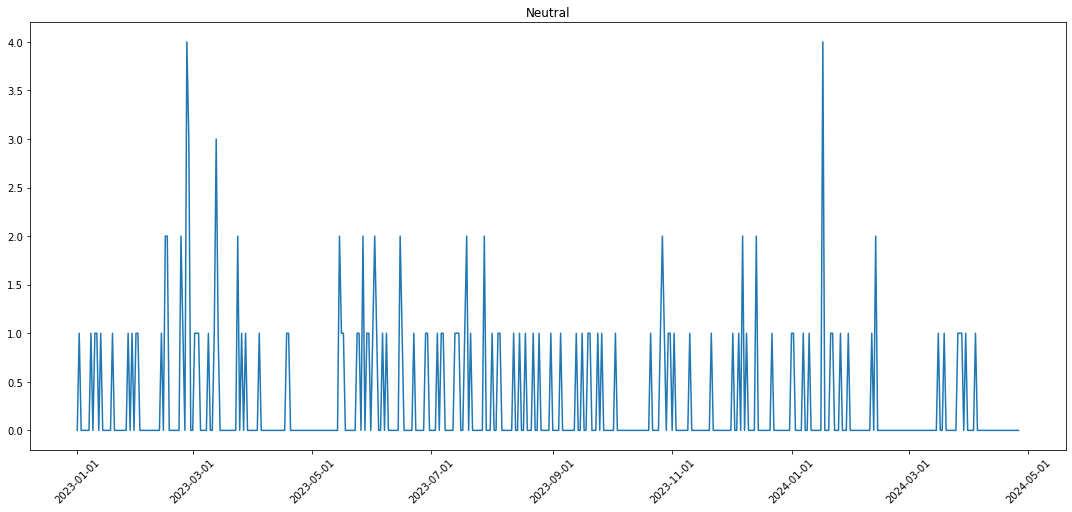

In [83]:
plt.figure(figsize=(15,7))
plt.plot(neutral_complete['date'], neutral_complete['total'])
# Date formatting
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(AutoDateLocator())
# Rotate date labels for better readability
plt.xticks(rotation=45)
# Automatically adjust subplot params for a better fit
plt.tight_layout()
plt.title("Neutral")
plt.show()

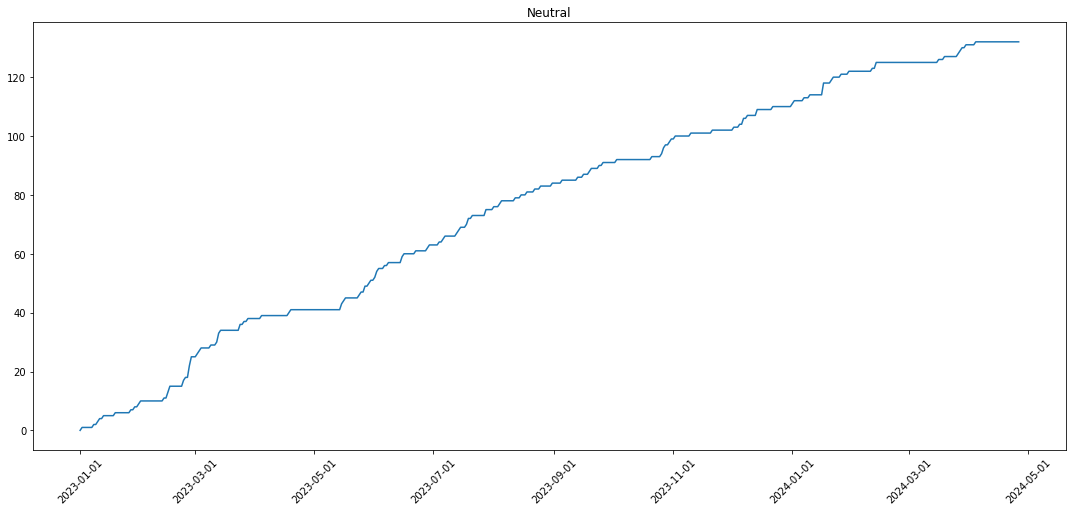

In [79]:
plt.figure(figsize=(15,7))
plt.plot(neutral_complete['date'], neutral_complete['cumsum'])
# Date formatting
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(AutoDateLocator())
# Rotate date labels for better readability
plt.xticks(rotation=45)
# Automatically adjust subplot params for a better fit
plt.tight_layout()
plt.title("Neutral")
plt.show()

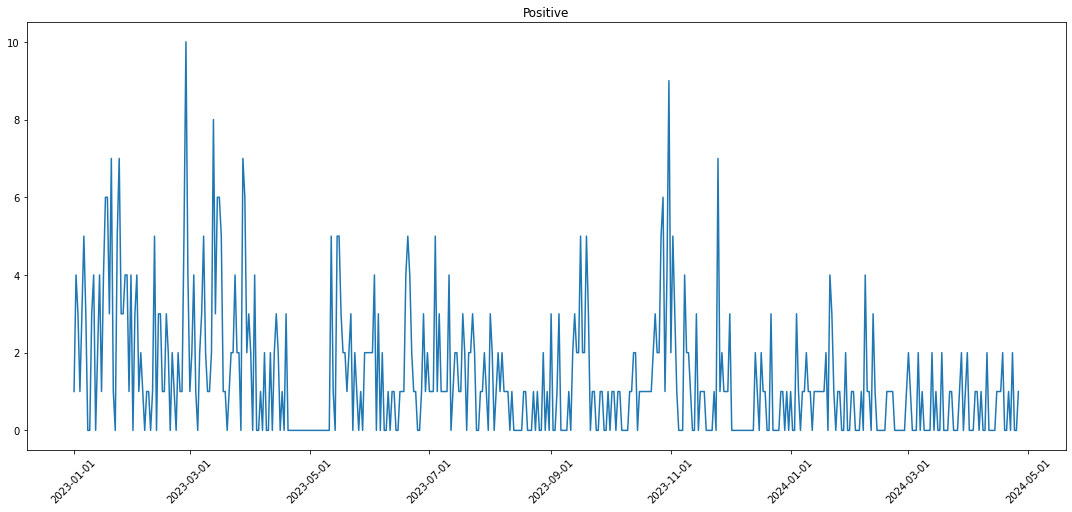

In [85]:
plt.figure(figsize=(15,7))
plt.plot(positive_complete['date'], positive_complete['total'])
# Date formatting
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(AutoDateLocator())
# Rotate date labels for better readability
plt.xticks(rotation=45)
# Automatically adjust subplot params for a better fit
plt.tight_layout()
plt.title("Positive")
plt.show()

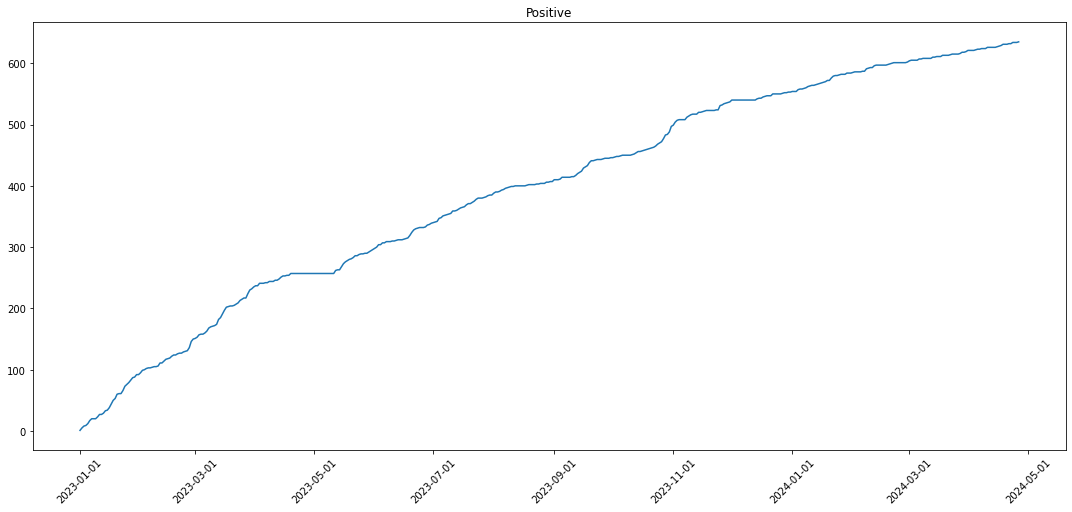

In [86]:
plt.figure(figsize=(15,7))
plt.plot(positive_complete['date'], positive_complete['cumsum'])
# Date formatting
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(AutoDateLocator())
# Rotate date labels for better readability
plt.xticks(rotation=45)
# Automatically adjust subplot params for a better fit
plt.tight_layout()
plt.title("Positive")
plt.show()

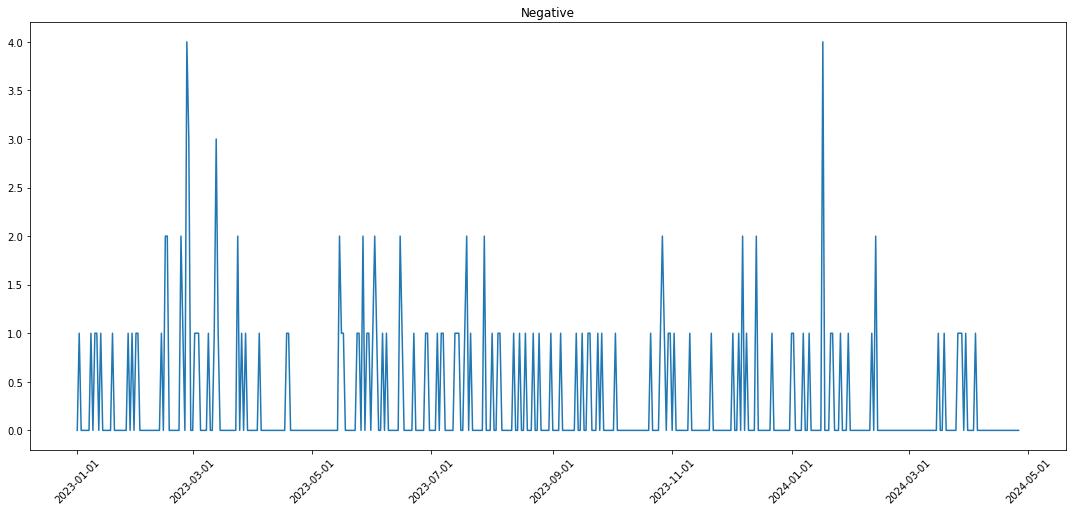

In [88]:
plt.figure(figsize=(15,7))
plt.plot(negative_complete['date'], negative_complete['total'])
# Date formatting
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(AutoDateLocator())
# Rotate date labels for better readability
plt.xticks(rotation=45)
# Automatically adjust subplot params for a better fit
plt.tight_layout()
plt.title("Negative")
plt.show()

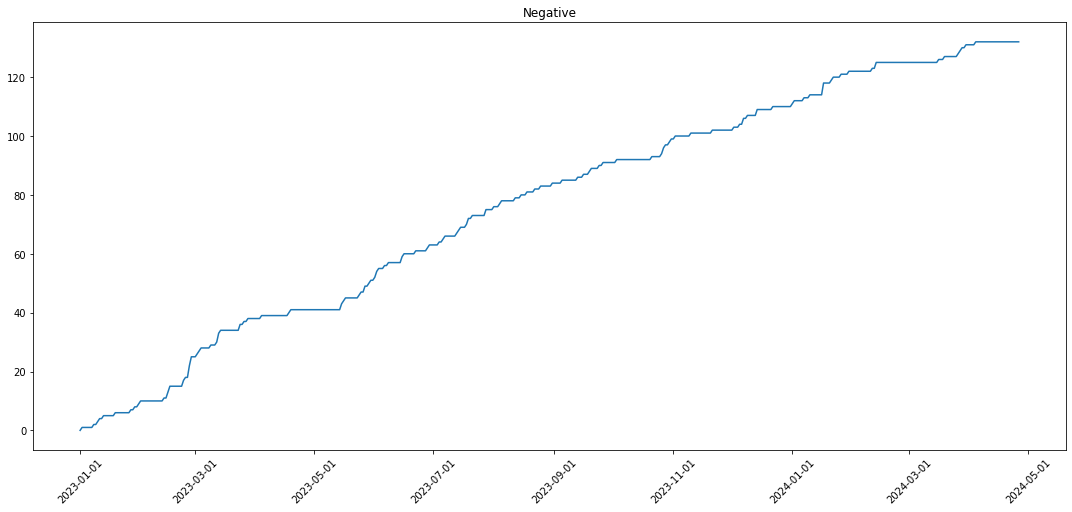

In [89]:
plt.figure(figsize=(15,7))
plt.plot(negative_complete['date'], negative_complete['cumsum'])
# Date formatting
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(AutoDateLocator())
# Rotate date labels for better readability
plt.xticks(rotation=45)
# Automatically adjust subplot params for a better fit
plt.tight_layout()
plt.title("Negative")
plt.show()